# 2017.10.29
to repeat the former transition npt eqilibrium of XI-water-vapor surface,
we are going to cut a piece from the intial bulk-l XI ice lattice.
It is no need to be large but should have enough layers in c axis to monitor the change along the surface,
since it is a phase transition, the sum of all change among all the layers stands for surface free energy.

In [74]:
import MDAnalysis
import numpy as np

u=MDAnalysis.Universe("bulkih-l.gro")
sel=u.select_atoms("byres prop y < 30.5 and prop x < 30")
sel.residues.resnames.shape
sel.residues.resnames=['SOL']*sel.residues.resnames.shape[0]
dim=u.dimensions+0
dim[:3]=np.max(sel.positions,0)+1
u.dimensions=dim
sel.write("cut.gro")

In [18]:
import MDAnalysis
import numpy as np
from matplotlib import pylab as plt

In [111]:
u=MDAnalysis.Universe("step4-aver.gro")

In [112]:
zinterval=7.41

In [113]:
zstart=8.09

In [114]:
u.select_atoms("byres prop z > 8.0 and prop z < 15")

<AtomGroup with 896 atoms>

In [115]:
16128/18

896

In [116]:
u.dimensions

array([  30.75030136,   32.30249786,  133.82180786,   90.        ,
         90.        ,   90.        ], dtype=float32)

In [117]:
data=[]
for n in np.linspace(0,u.dimensions[2],1000):
    selword="byres prop z < %6.2f" % n
    sel=u.select_atoms(selword)
    data.append(sel.n_atoms)

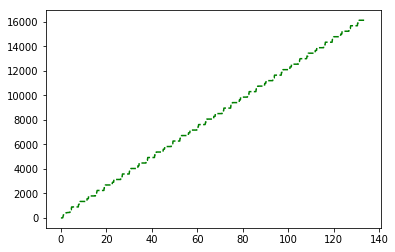

In [118]:
plt.plot(np.linspace(0,u.dimensions[2],1000),data,'g--',label='Number of ICE in z axis')
plt.show()

In [119]:
data2=np.array(data[1:])-np.array(data[:-1])

In [120]:
zstart=7.5

In [121]:
np.arange(zstart,u.dimensions[2],zinterval)

array([   7.5 ,   14.91,   22.32,   29.73,   37.14,   44.55,   51.96,
         59.37,   66.78,   74.19,   81.6 ,   89.01,   96.42,  103.83,
        111.24,  118.65,  126.06,  133.47])

In [122]:
plt.clf()
plt.plot(np.linspace(0,u.dimensions[2],1000)[1:],data2,'b--',label='Number of ICE in z axis')
for n in np.arange(zstart,u.dimensions[2],zinterval):
    plt.plot([n,n],[-20,250],'r--')
plt.savefig('n_ice_z.png',dpi=300)

In [124]:
inters=np.arange(zstart,u.dimensions[2],zinterval)

byres prop z <   7.50
byres prop z >  14.91 and prop z <  22.32
byres prop z >  22.32 and prop z <  29.73
byres prop z >  29.73 and prop z <  37.14
byres prop z >  37.14 and prop z <  44.55
byres prop z >  44.55 and prop z <  51.96
byres prop z >  51.96 and prop z <  59.37
byres prop z >  59.37 and prop z <  66.78
byres prop z >  66.78 and prop z <  74.19
byres prop z >  74.19 and prop z <  81.60
byres prop z >  81.60 and prop z <  89.01
byres prop z >  89.01 and prop z <  96.42
byres prop z >  96.42 and prop z < 103.83
byres prop z > 103.83 and prop z < 111.24
byres prop z > 111.24 and prop z < 118.65
byres prop z > 118.65 and prop z < 126.06
byres prop z > 126.06 and prop z < 133.47


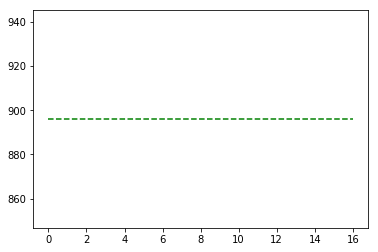

In [170]:
plt.clf()
data=[]
sels=[]
for n in range(len(inters))[:-1]:
    #print n
    if n==0:
        selword="byres prop z < %6.2f" % inters[n]
        sel=u.select_atoms(selword)
        sels.append(sel)
        print selword
        data.append(sel.n_atoms)
    else:
        selword="byres prop z > %6.2f and prop z < %6.2f" % (inters[n],inters[n+1])
        print selword
        sel=u.select_atoms(selword)
        sels.append(sel)
        data.append(sel.n_atoms)
plt.plot(data,'g--')
plt.show()

In [77]:
sel.write("mix-0.gro")

In [136]:
np.max(u.atoms.positions)

132.29999

In [126]:
u2=MDAnalysis.Universe("ice-long.gro")

In [165]:
sol=u2.select_atoms('byres prop z < 160 and prop z > 134')

In [138]:
np.min(sol.positions,0)

array([   0.46000001,    0.62      ,  135.12998962], dtype=float32)

In [139]:
sels.append(sol)

[4, 5, 6, 7, 8, 9, 10, 11, 12]

In [175]:
for n in range(4,13):
    #print n
    totf=[0,1]
    icf=range(2,n)
    ico=range(n,14)
    for n_sel,sel in enumerate(sels):
        if n_sel in totf:
            sel.residues.resnames=["FRZ"]*sel.residues.resids.shape[0]
        elif n_sel in icf:
            sel.residues.resnames=["ICF"]*sel.residues.resids.shape[0]
        elif n_sel in ico:
            sel.residues.resnames=["ICO"]*sel.residues.resids.shape[0]
        else:
            sel.residues.resnames=["SOL"]*sel.residues.resids.shape[0]
            
    sel=np.sum(sels[1:])
    u3=MDAnalysis.Merge(sel,sol)
    dim=u.dimensions
    dim[2]=200
    u3.dimensions=dim
    u3.atoms.write("mix-%d.gro" % n)
    print "No. %d, writing icf at " % n,
    print icf,
    print ", ico at ",
    print ico
    print "FRZ NUM: %d,ICF NUM: %d,ICE NUM: %d, SOL NUM: %d" % \
        (u3.select_atoms("resname FRZ").n_atoms,u3.select_atoms("resname ICF").n_atoms,\
        u3.select_atoms("resname ICO").n_atoms,u3.select_atoms("resname SOL").n_atoms)

No. 4, writing icf at  [2, 3] , ico at  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 1792,ICE NUM: 8960, SOL NUM: 5748
No. 5, writing icf at  [2, 3, 4] , ico at  [5, 6, 7, 8, 9, 10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 2688,ICE NUM: 8064, SOL NUM: 5748
No. 6, writing icf at  [2, 3, 4, 5] , ico at  [6, 7, 8, 9, 10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 3584,ICE NUM: 7168, SOL NUM: 5748
No. 7, writing icf at  [2, 3, 4, 5, 6] , ico at  [7, 8, 9, 10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 4480,ICE NUM: 6272, SOL NUM: 5748
No. 8, writing icf at  [2, 3, 4, 5, 6, 7] , ico at  [8, 9, 10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 5376,ICE NUM: 5376, SOL NUM: 5748
No. 9, writing icf at  [2, 3, 4, 5, 6, 7, 8] , ico at  [9, 10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 6272,ICE NUM: 4480, SOL NUM: 5748
No. 10, writing icf at  [2, 3, 4, 5, 6, 7, 8, 9] , ico at  [10, 11, 12, 13]
FRZ NUM: 896,ICF NUM: 7168,ICE NUM: 3584, SOL NUM: 5748
No. 11, writing icf at  [2, 3, 4, 5, 6, 7, 8, 9, 10] , ico at  [11, 12, 13]
FRZ NU